In [2]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from local_variables import local_datasets_path


In [3]:
with open(os.path.join(local_datasets_path, 'datasets_properties.json'), "r") as f:
    dataset_properties = json.load(f)  # Assume multiple datasets are in this format
    
models = ['e_gcn', 'e_graph_sage']
# models = ['e_gcn', 'e_gat']
# models = ['e_graph_sage', 'e_gat]

class_names = ["Sampled", "Full Neighborhood"]
# class_names = ["Unifrom Weights", "Attention Mechanism"]


## Data Preparation

In [6]:

properties = []
for name, data in dataset_properties.items():
    dataset = data['dataset_properties']
    graph_properties = data['graph_properties']
    # print(f"==>> dataset: {graph_properties}")
    # break

    properties.append({
        'Dataset': name,
        'total_nodes': graph_properties['total_nodes'],
        'number_of_edges': graph_properties['number_of_edges'],
        'Multi-class Gini': dataset['Multi-class Gini Coefficient'],
        'Binary Gini': dataset['Binary Classification Gini Coefficient'],
        'max_degree': graph_properties['max_degree'],
        'avg_degree': graph_properties['avg_degree'],
        'density': graph_properties['density'],
        'degree_skewness': graph_properties['degree_skewness'],
        'degree_alpha': graph_properties['degree_alpha'],
        'degree_relative_entropy': graph_properties['degree_relative_entropy'],
        'degree_scale_free': graph_properties['degree_scale_free'],
        'pagerank_skewness': graph_properties['pagerank_skewness'],
        'pagerank_relative_entropy': graph_properties['pagerank_relative_entropy'],
        'pagerank_alpha': graph_properties['pagerank_alpha'],
        'pagerank_scale_free': graph_properties['pagerank_scale_free'],
        'betweenness_skewness': graph_properties['betweenness_skewness'],
        'betweenness_relative_entropy': graph_properties['betweenness_relative_entropy'],
        'betweenness_alpha': graph_properties['betweenness_alpha'],
        'betweenness_scale_free': graph_properties['betweenness_scale_free'],
        'k_truss_skewness': graph_properties['k_truss_skewness'],
        'k_truss_relative_entropy': graph_properties['k_truss_relative_entropy'],
        'k_truss_alpha': graph_properties['k_truss_alpha'],
        'k_truss_scale_free': graph_properties['k_truss_scale_free'],
        'intersection between attacks and victims': graph_properties['intersection between attacks and victims'],
        'Proportion of Attackers': graph_properties['Proportion of Attackers'],
        'class_diversity_entropy': graph_properties['class_diversity_entropy'],
        'class_diversity_ratio': graph_properties['class_diversity_ratio'],
    })
# properties

In [11]:
properties_df = pd.DataFrame(properties)
properties_df
properties_df[["Dataset", "avg_degree"]].to_dict()

{'Dataset': {0: 'cic_ton_iot',
  1: 'cic_ids_2017',
  2: 'cic_bot_iot',
  3: 'cic_ton_iot_modified',
  4: 'ccd_inid_modified',
  5: 'nf_uq_nids_modified',
  6: 'edge_iiot',
  7: 'nf_cse_cic_ids2018',
  8: 'nf_uq_nids',
  9: 'x_iiot'},
 'avg_degree': {0: 75.00694614807702,
  1: 294.30477285796434,
  2: 91343.65986394558,
  3: 149.98062340753398,
  4: 1246.5825242718447,
  5: 27033.325153374233,
  6: 22.9991906958318,
  7: 158.8537891044922,
  8: 229.1428052752416,
  9: 11282.392857142857}}

In [125]:

d = {}
for i in properties_df["density"].to_dict():
    d[properties_df["Dataset"][i]] = properties_df["density"][i]

d

{'cic_ton_iot': np.float64(0.00026287235451564827),
 'cic_ids_2017': np.float64(0.007693035676964772),
 'cic_bot_iot': np.float64(155.87655266884911),
 'cic_ton_iot_modified': np.float64(0.0011441565973538646),
 'ccd_inid_modified': np.float64(6.110698648391395),
 'nf_uq_nids_modified': np.float64(83.4361887449822),
 'edge_iiot': np.float64(6.508197985169785e-05),
 'nf_cse_cic_ids2018': np.float64(0.0008624733370134876),
 'nf_uq_nids': np.float64(0.001223478307607757),
 'x_iiot': np.float64(50.82158944658945)}

In [126]:
for feature in properties_df.columns:
    if feature != "Dataset":
        print(f"==>> feature: {feature}")
        # Sort the DataFrame by the current feature in ascending order and print the "Dataset" column along with the current feature.
        sorted_df = properties_df.sort_values(by=feature, ascending=True)
        print(sorted_df[["Dataset", feature]])


==>> feature: Multi-class Gini
                Dataset  Multi-class Gini
4     ccd_inid_modified          0.419770
2           cic_bot_iot          0.436253
3  cic_ton_iot_modified          0.635358
9                x_iiot          0.683325
0           cic_ton_iot          0.751213
6             edge_iiot          0.761388
5   nf_uq_nids_modified          0.835980
1          cic_ids_2017          0.878124
8            nf_uq_nids          0.884595
7    nf_cse_cic_ids2018          0.904128
==>> feature: Binary Gini
                Dataset  Binary Gini
9                x_iiot     0.014091
4     ccd_inid_modified     0.020460
0           cic_ton_iot     0.030134
3  cic_ton_iot_modified     0.072417
5   nf_uq_nids_modified     0.201140
6             edge_iiot     0.206522
8            nf_uq_nids     0.286718
1          cic_ids_2017     0.304976
7    nf_cse_cic_ids2018     0.413629
2           cic_bot_iot     0.493358
==>> feature: max_degree
                Dataset  max_degree
4     ccd_ini

In [127]:
f1_scores = pd.read_csv(os.path.join("results", 'f1_scores.csv'), usecols=['Dataset'] + models)
f1_scores

,Dataset,e_gcn,e_graph_sage
0,cic_ids_2017,98.1600,98.403
1,cic_ton_iot_modified,84.0500,84.400
2,ccd_inid_modified,82.4600,93.660
3,x_iiot,94.1210,93.410
4,edge_iiot,95.0609,96.980
5,cic_ton_iot,84.8310,82.850
6,nf_uq_nids,85.6200,84.270
7,nf_cse_cic_ids2018,94.6800,93.950
8,nf_uq_nids_modified,88.0100,90.980


In [128]:
f1_scores['Dataset'] = f1_scores['Dataset'].str.strip().str.lower()
properties_df['Dataset'] = properties_df['Dataset'].str.strip().str.lower()

merged_df = pd.merge(properties_df, f1_scores, on='Dataset')
merged_df

,Dataset,Multi-class Gini,Binary Gini,max_degree,avg_degree,density,degree_skewness,degree_alpha,degree_relative_entropy,degree_scale_free,...,k_truss_skewness,k_truss_relative_entropy,k_truss_alpha,k_truss_scale_free,intersection between attacks and victims,Proportion of Attackers,class_diversity_entropy,class_diversity_ratio,e_gcn,e_graph_sage
0,cic_ton_iot,0.751213,0.030134,2066788,75.006946,0.000263,165.845590,1.539547,0.174882,0,...,242.351309,0.101750,48.424412,0,5,0.000077,0.0001,0.5253,84.8310,82.850
1,cic_ids_2017,0.878124,0.304976,983995,294.304773,0.007693,64.960663,2.046122,0.440548,1,...,44.973416,0.172750,3.204116,0,8,0.000523,0.0001,0.3379,98.1600,98.403
2,cic_ton_iot_modified,0.635358,0.072417,2066788,149.980623,0.001144,114.571773,5.279120,0.176466,0,...,168.239282,0.104800,38.509320,0,5,0.000122,0.0001,0.4130,84.0500,84.400
3,ccd_inid_modified,0.419770,0.020460,25411,1246.582524,6.110699,4.318782,1.337243,0.814577,0,...,3.433250,0.053581,37.289894,0,32,0.475728,0.2622,0.4196,82.4600,93.660
4,nf_uq_nids_modified,0.835980,0.201140,278276,27033.325153,83.436189,1.951127,1.249088,0.687675,0,...,4.396178,0.056646,19.798043,0,8,0.073620,0.1259,0.0525,88.0100,90.980
5,edge_iiot,0.761388,0.206522,1751388,22.999191,0.000065,277.834880,114.007111,0.021798,0,...,-3.518721,0.020002,58192.373208,0,12886,0.776236,0.0001,0.9998,95.0609,96.980
6,nf_cse_cic_ids2018,0.904128,0.413629,2056618,158.853789,0.000862,225.015256,1.780424,0.239182,0,...,105.992459,0.005790,174.154738,0,66,0.007862,0.0022,0.6175,94.6800,93.950
7,nf_uq_nids,0.884595,0.286718,2056618,229.142805,0.001223,174.187715,1.770360,0.240163,0,...,106.771652,0.006367,155.511399,0,81,0.007998,0.0025,0.6170,85.6200,84.270
8,x_iiot,0.683325,0.014091,294296,11282.392857,50.821589,5.259451,1.263443,0.829736,0,...,1.661241,0.161024,9.615089,0,3,0.080357,0.0387,0.2089,94.1210,93.410


In [129]:
merged_df.columns

Index(['Dataset', 'Multi-class Gini', 'Binary Gini', 'max_degree',
       'avg_degree', 'density', 'degree_skewness', 'degree_alpha',
       'degree_relative_entropy', 'degree_scale_free', 'pagerank_skewness',
       'pagerank_relative_entropy', 'pagerank_alpha', 'pagerank_scale_free',
       'betweenness_skewness', 'betweenness_relative_entropy',
       'betweenness_alpha', 'betweenness_scale_free', 'k_truss_skewness',
       'k_truss_relative_entropy', 'k_truss_alpha', 'k_truss_scale_free',
       'intersection between attacks and victims', 'Proportion of Attackers',
       'class_diversity_entropy', 'class_diversity_ratio', 'e_gcn',
       'e_graph_sage'],
      dtype='object')

## Random Forest

To check for each model alone

In [130]:


def compute_feature_importance(merged_df, models, target_model):
    """
    Trains a Random Forest classifier on the full dataset to compute feature importance 
    for predicting when the given target model performs best.

    Args:
        merged_df (pd.DataFrame): The DataFrame containing model scores and features.
        models (list): List of model names in the DataFrame.
        target_model (str): The model for which feature importance is computed.

    Returns:
        pd.DataFrame: A DataFrame containing feature importance scores.
    """
    print(f"\n{'='*30}\nComputing feature importance for: {target_model}\n{'='*30}")

    # Define features (exclude model scores, dataset column, and other binary target columns)
    exclude_columns = models + ["Dataset"] + [f"{m}_better" for m in models]
    X = merged_df.drop(columns=exclude_columns)
    y = merged_df[f'{target_model}_better']

    # Train Random Forest Classifier on the full dataset (no train-test split)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Compute feature importances
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': clf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print(feature_importance)
    return feature_importance


In [131]:
feature_importance_results = {}

for model in models:
    merged_df[f'{model}_better'] = (merged_df[models].idxmax(axis=1) == model).astype(int)

for model in models:
    feature_importance_results[model] = compute_feature_importance(merged_df, models, model)



Computing feature importance for: e_gcn
                                     Feature  Importance
18                  k_truss_relative_entropy    0.103000
6                               degree_alpha    0.071210
24                     class_diversity_ratio    0.065186
22                   Proportion of Attackers    0.059829
9                          pagerank_skewness    0.056784
15                         betweenness_alpha    0.056031
11                            pagerank_alpha    0.053722
5                            degree_skewness    0.050845
0                           Multi-class Gini    0.047147
3                                 avg_degree    0.047133
1                                Binary Gini    0.044612
19                             k_truss_alpha    0.044428
2                                 max_degree    0.042391
17                          k_truss_skewness    0.041733
4                                    density    0.040328
23                   class_diversity_entropy   

## Correlation Matrix

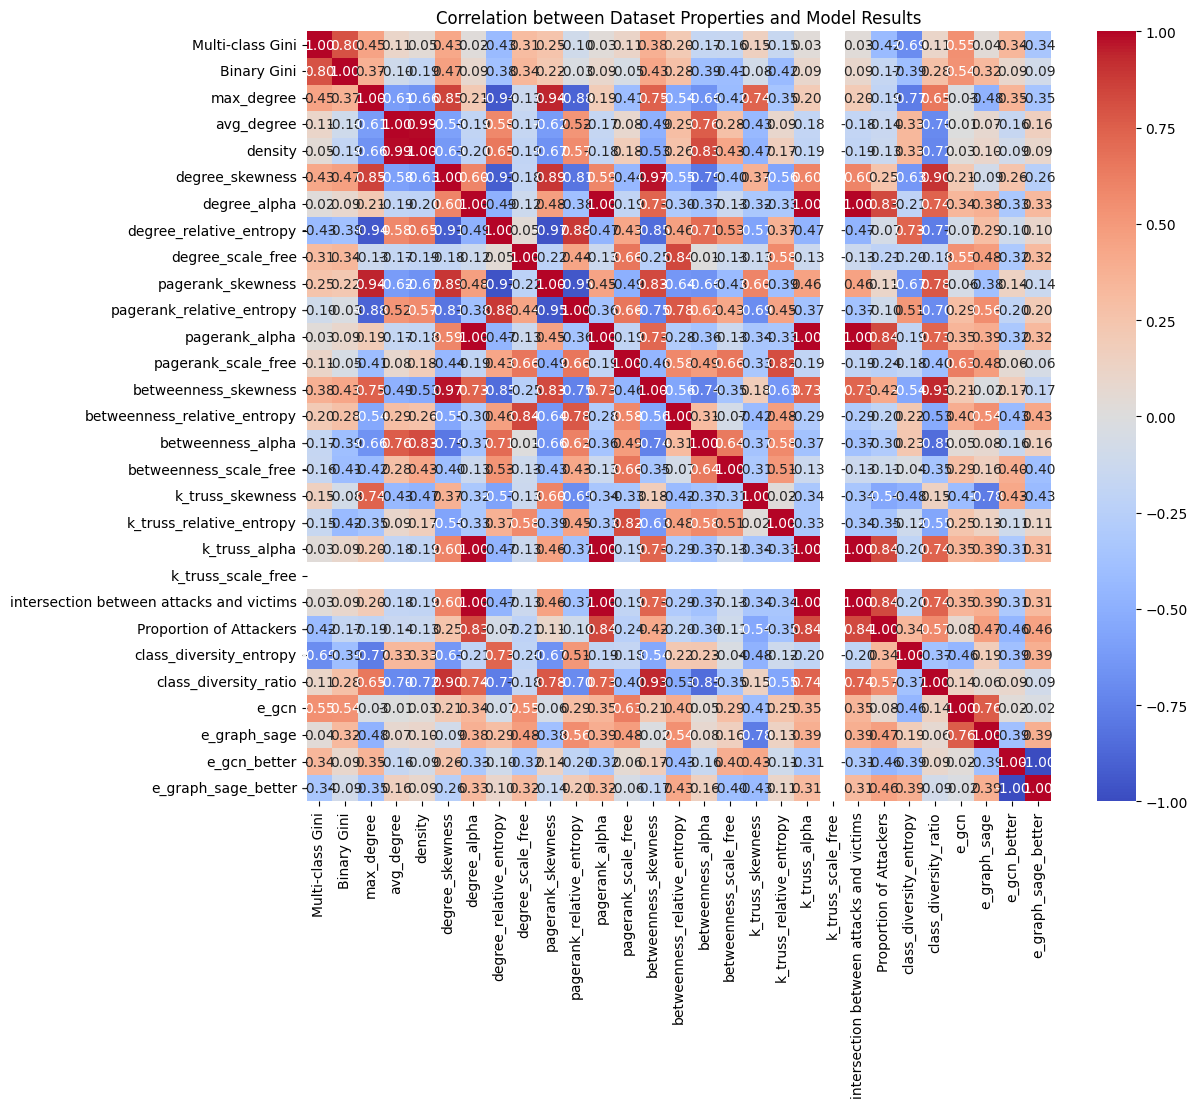

In [132]:
# Remove non-numeric columns for correlation calculation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Step 5: Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Dataset Properties and Model Results')
plt.show()

# Datasets Clustering

## t

In [133]:
feature_columns = list(properties_df.columns.drop("Dataset"))


Datasets grouped into clusters:
                Dataset  Cluster
0           cic_ton_iot        1
1          cic_ids_2017        2
2  cic_ton_iot_modified        1
3     ccd_inid_modified        0
4   nf_uq_nids_modified        0
5             edge_iiot        1
6    nf_cse_cic_ids2018        1
7            nf_uq_nids        1
8                x_iiot        0


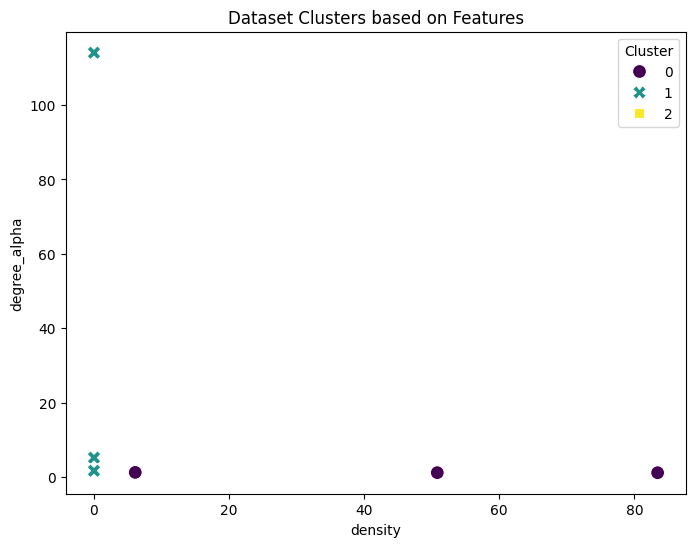

In [134]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features = merged_df[feature_columns]
merged_df['Cluster'] = kmeans.fit_predict(features)

# Display datasets with their assigned clusters
print("\nDatasets grouped into clusters:")
print(merged_df[['Dataset', 'Cluster']])

# Step 6: Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='density', 
    y='degree_alpha', 
    hue='Cluster', 
    data=merged_df, 
    palette='viridis', 
    style='Cluster', 
    s=100
)
plt.title('Dataset Clusters based on Features')
plt.xlabel('density')
plt.ylabel('degree_alpha')
plt.legend(title='Cluster')
plt.show()

merged_df = merged_df.drop(["Cluster"], axis=1)

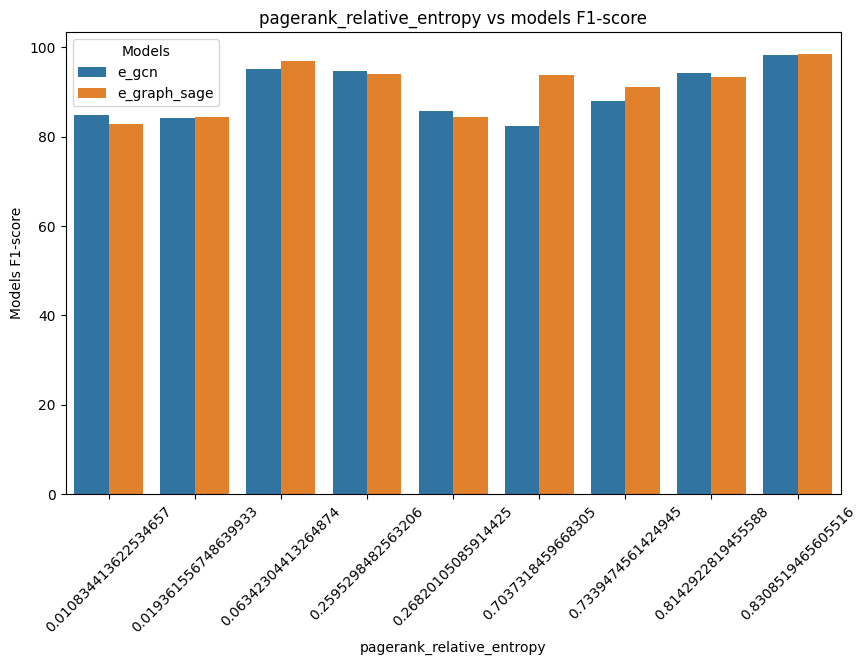

In [135]:
feature = "pagerank_relative_entropy"
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df[models + [feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
            x=feature, y='F1-score', hue='model')

plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel('Models F1-score')
plt.legend(title="Models")
plt.xticks(rotation=45)
plt.show()

# in case you want to visualize for each feautre


# for feature in feature_columns:
#     plt.figure(figsize=(10, 6))
#     # sns.barplot(data=merged_df[["e_gcn", "e_gat", feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
#     #             x=feature, y='F1-score', hue='model')
#     sns.barplot(data=merged_df[models + [feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
#                 x=feature, y='F1-score', hue='model')

#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('Models F1-score')
#     plt.legend(title="Models")
#     plt.xticks(rotation=45)
#     plt.show()

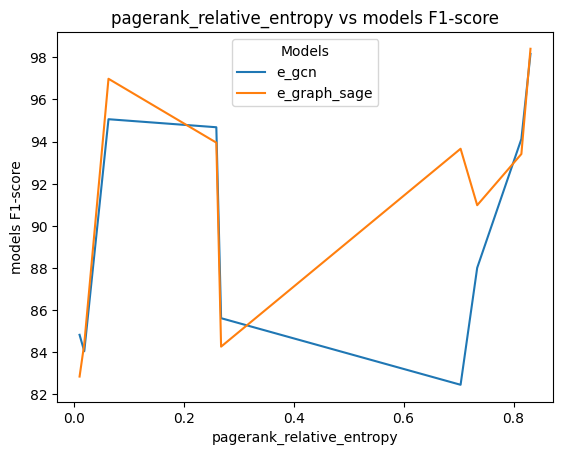

In [136]:
feature = "pagerank_relative_entropy"
for m in models:
    sns.lineplot(data=merged_df, x=feature, y=m, label=m)
plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel('models F1-score')
plt.legend(title="Models")
plt.show()
    
# in case you want to visualize for each feautre

# for feature in feature_columns:
#     for m in models:
#         sns.lineplot(data=merged_df, x=feature, y=m, label=m)
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.legend(title="Models")
#     plt.show()


## Highest Score

In [137]:
merged_df['score_max'] = merged_df[models].max(axis=1)

In [138]:
for model in models:
    print(f"==>> model: {model}")
    better_cases = merged_df['score_max'] == merged_df[model]
    print(f"\nCases where {model} performs better:")
    print(merged_df[better_cases][['Dataset'] + models])

==>> model: e_gcn

Cases where e_gcn performs better:
              Dataset   e_gcn  e_graph_sage
0         cic_ton_iot  84.831         82.85
6  nf_cse_cic_ids2018  94.680         93.95
7          nf_uq_nids  85.620         84.27
8              x_iiot  94.121         93.41
==>> model: e_graph_sage

Cases where e_graph_sage performs better:
                Dataset    e_gcn  e_graph_sage
1          cic_ids_2017  98.1600        98.403
2  cic_ton_iot_modified  84.0500        84.400
3     ccd_inid_modified  82.4600        93.660
4   nf_uq_nids_modified  88.0100        90.980
5             edge_iiot  95.0609        96.980


## Decision Tree

Decision Tree for Predicting When 'Sampled' Outperforms 'Full Neighborhood'


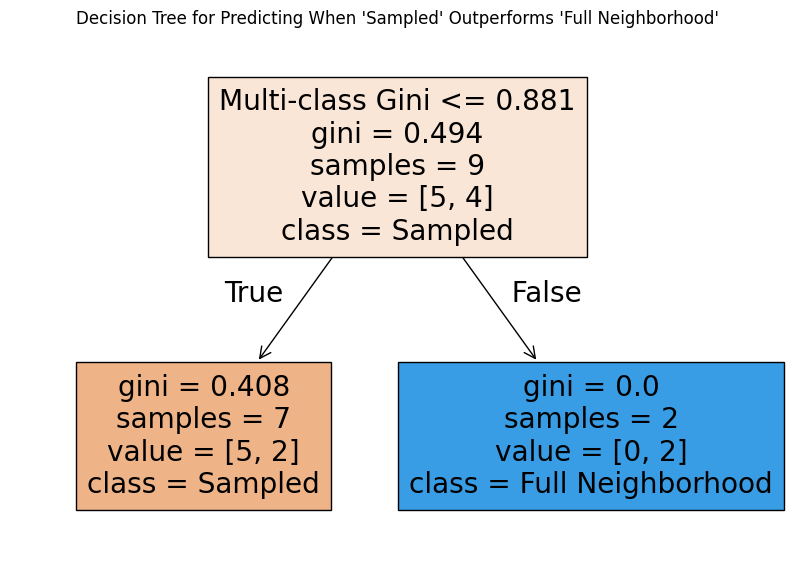

|--- Multi-class Gini <= 0.88
|   |--- class: 0
|--- Multi-class Gini >  0.88
|   |--- class: 1



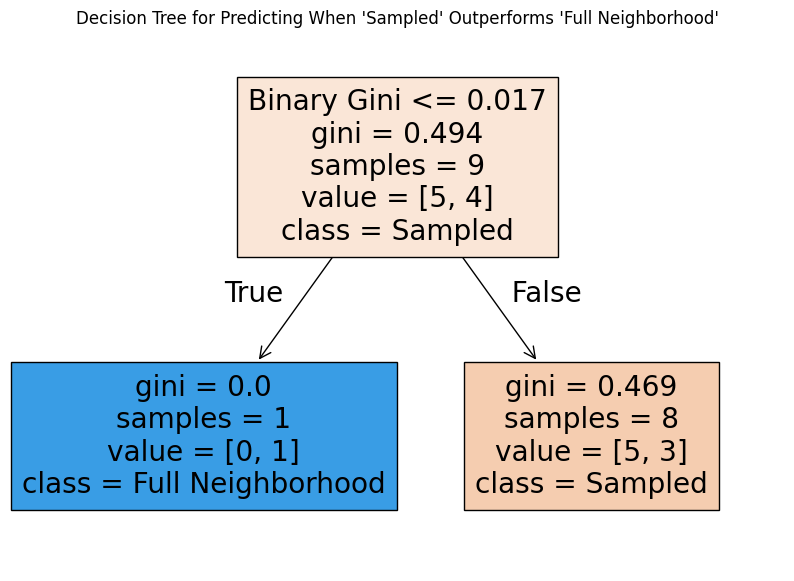

|--- Binary Gini <= 0.02
|   |--- class: 1
|--- Binary Gini >  0.02
|   |--- class: 0



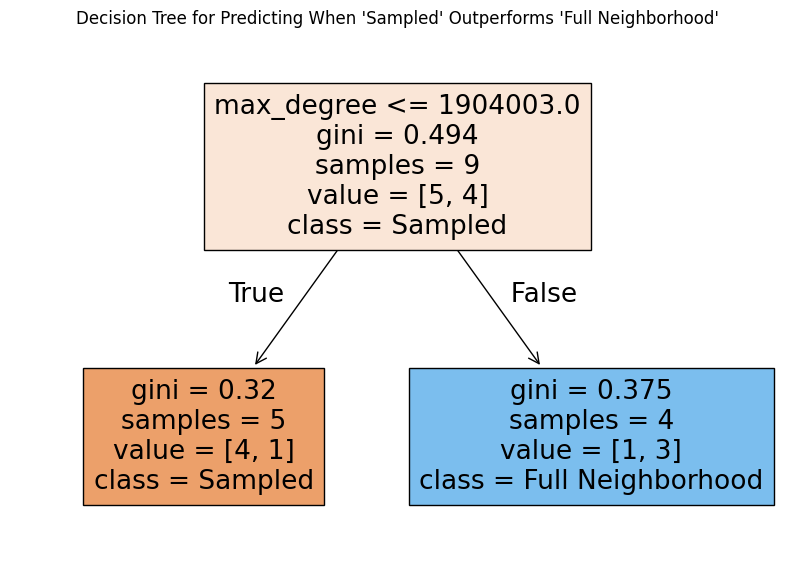

|--- max_degree <= 1904003.00
|   |--- class: 0
|--- max_degree >  1904003.00
|   |--- class: 1



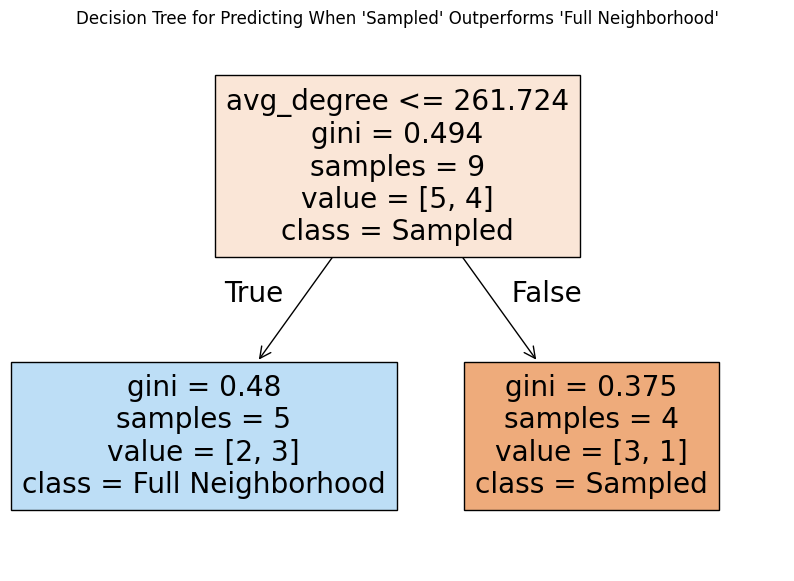

|--- avg_degree <= 261.72
|   |--- class: 1
|--- avg_degree >  261.72
|   |--- class: 0



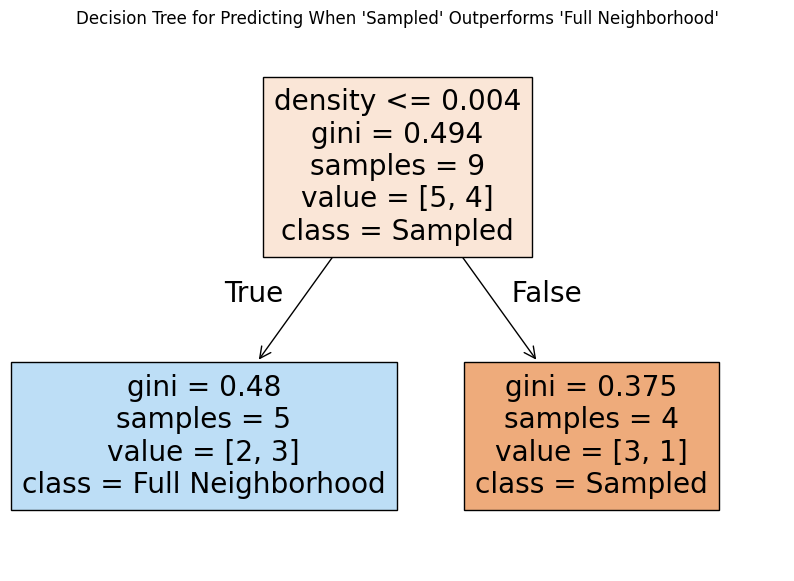

|--- density <= 0.00
|   |--- class: 1
|--- density >  0.00
|   |--- class: 0



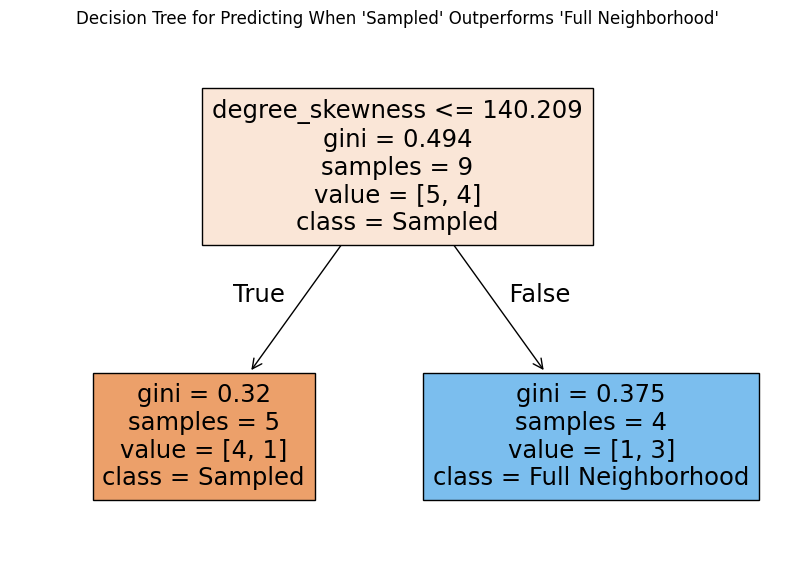

|--- degree_skewness <= 140.21
|   |--- class: 0
|--- degree_skewness >  140.21
|   |--- class: 1



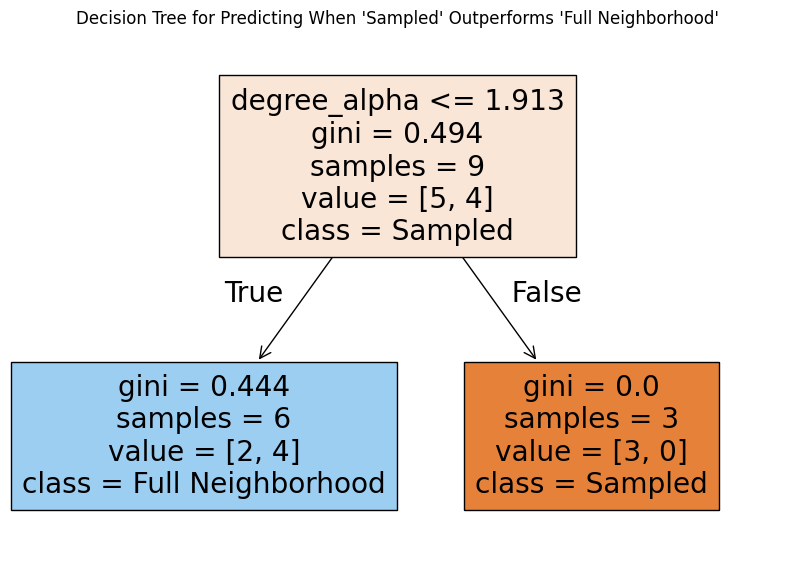

|--- degree_alpha <= 1.91
|   |--- class: 1
|--- degree_alpha >  1.91
|   |--- class: 0



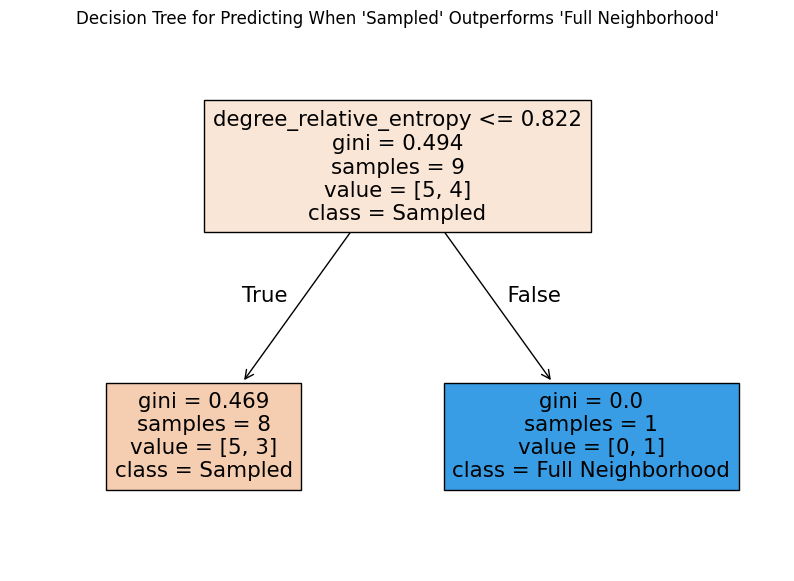

|--- degree_relative_entropy <= 0.82
|   |--- class: 0
|--- degree_relative_entropy >  0.82
|   |--- class: 1



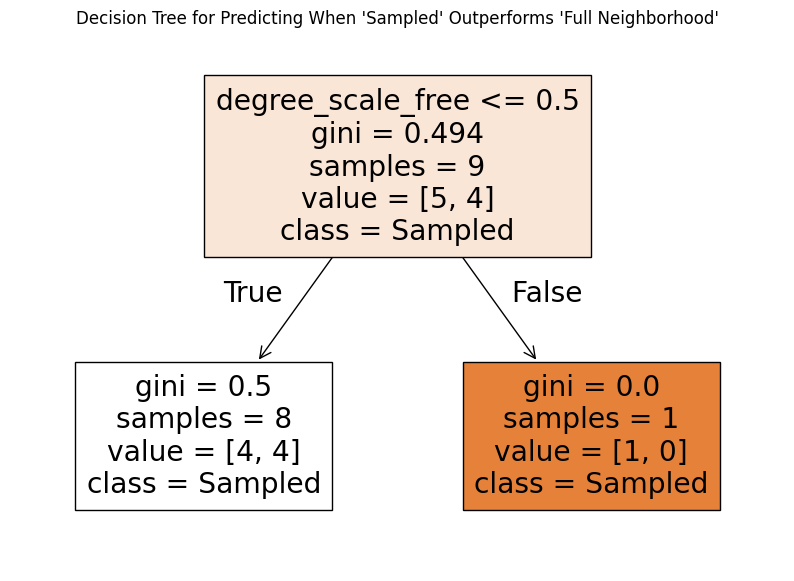

|--- degree_scale_free <= 0.50
|   |--- class: 0
|--- degree_scale_free >  0.50
|   |--- class: 0



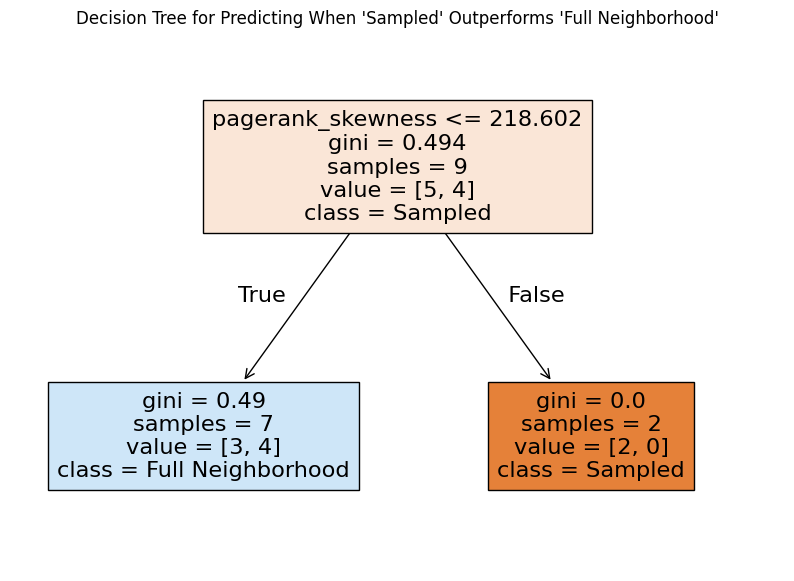

|--- pagerank_skewness <= 218.60
|   |--- class: 1
|--- pagerank_skewness >  218.60
|   |--- class: 0



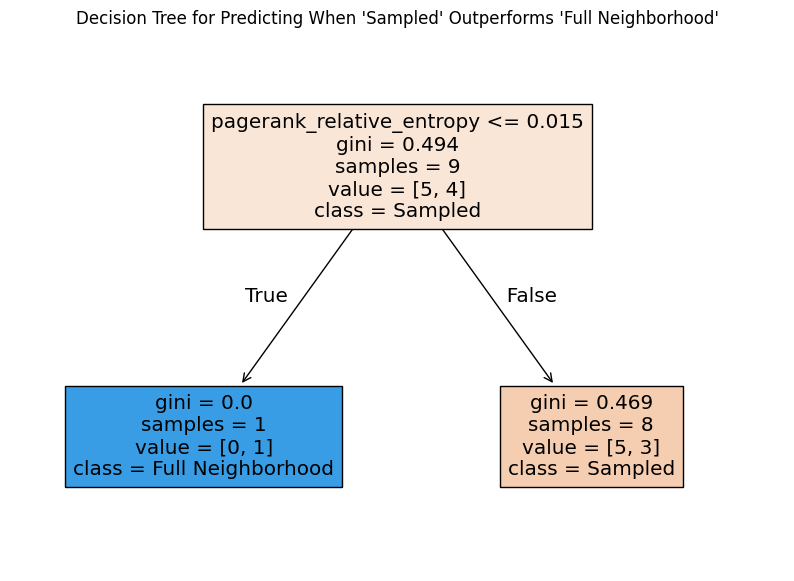

|--- pagerank_relative_entropy <= 0.02
|   |--- class: 1
|--- pagerank_relative_entropy >  0.02
|   |--- class: 0



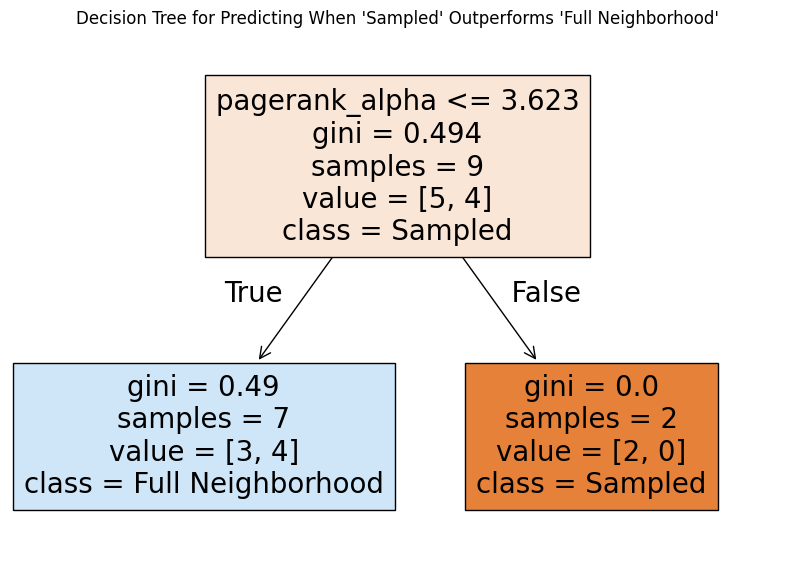

|--- pagerank_alpha <= 3.62
|   |--- class: 1
|--- pagerank_alpha >  3.62
|   |--- class: 0



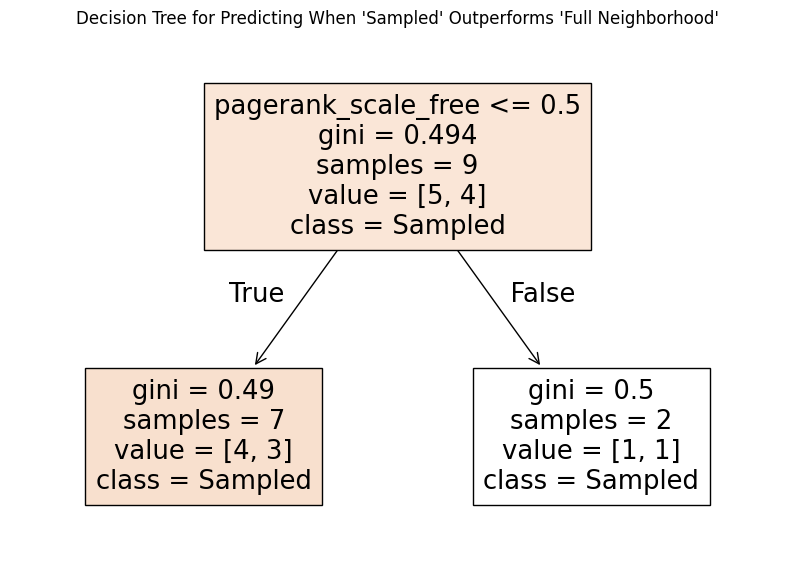

|--- pagerank_scale_free <= 0.50
|   |--- class: 0
|--- pagerank_scale_free >  0.50
|   |--- class: 0



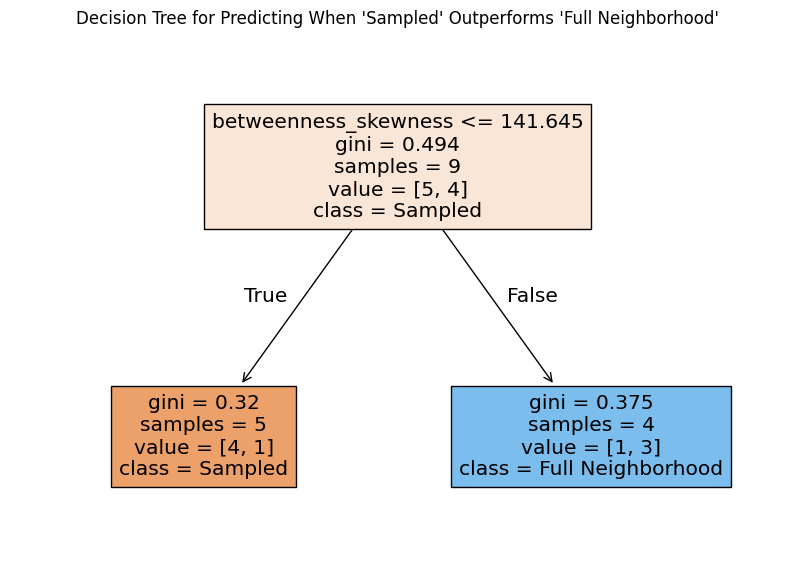

|--- betweenness_skewness <= 141.64
|   |--- class: 0
|--- betweenness_skewness >  141.64
|   |--- class: 1



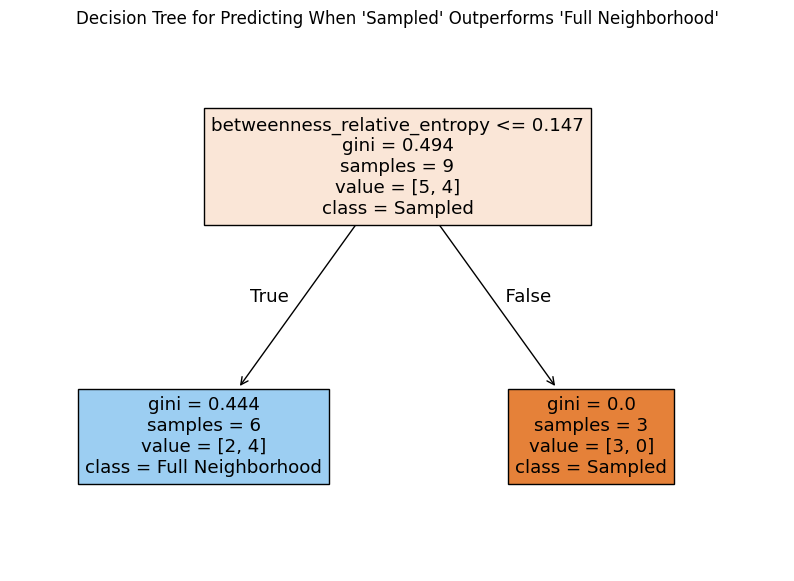

|--- betweenness_relative_entropy <= 0.15
|   |--- class: 1
|--- betweenness_relative_entropy >  0.15
|   |--- class: 0



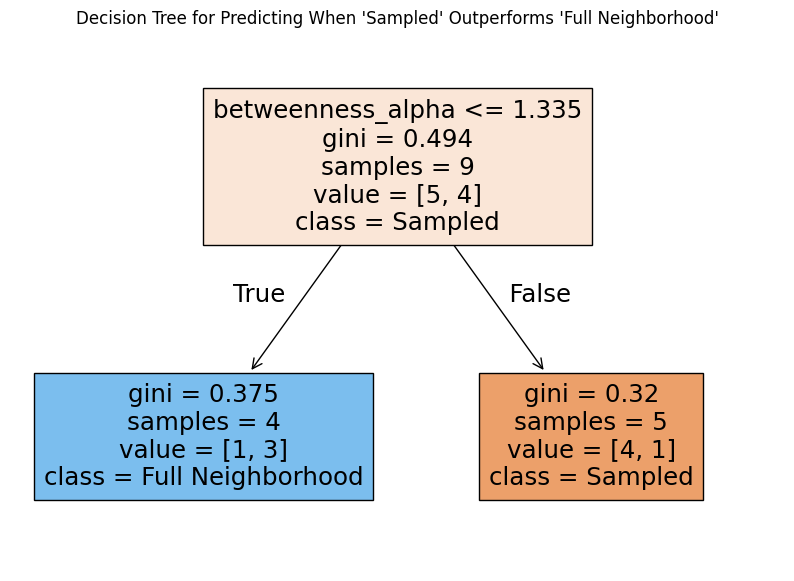

|--- betweenness_alpha <= 1.34
|   |--- class: 1
|--- betweenness_alpha >  1.34
|   |--- class: 0



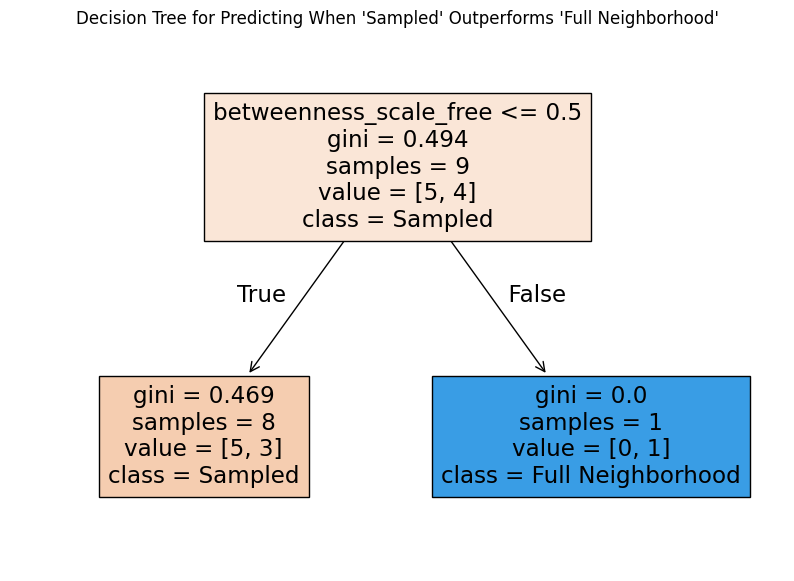

|--- betweenness_scale_free <= 0.50
|   |--- class: 0
|--- betweenness_scale_free >  0.50
|   |--- class: 1



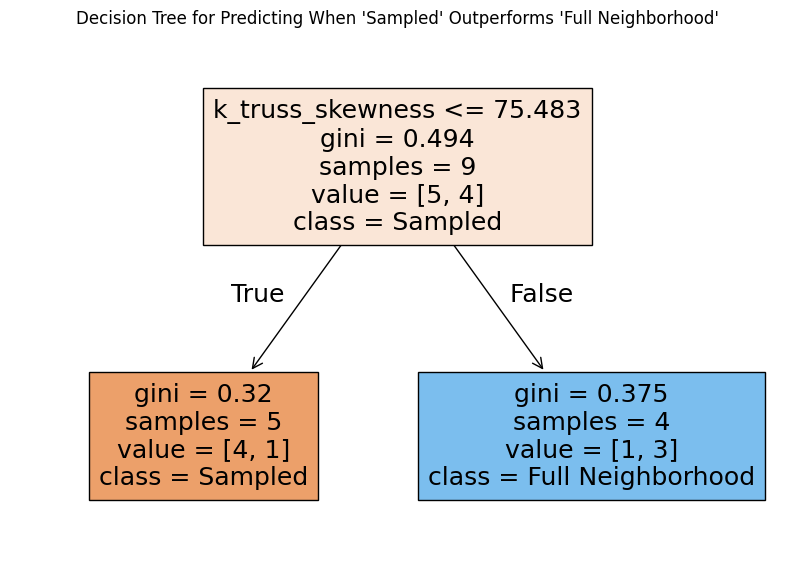

|--- k_truss_skewness <= 75.48
|   |--- class: 0
|--- k_truss_skewness >  75.48
|   |--- class: 1



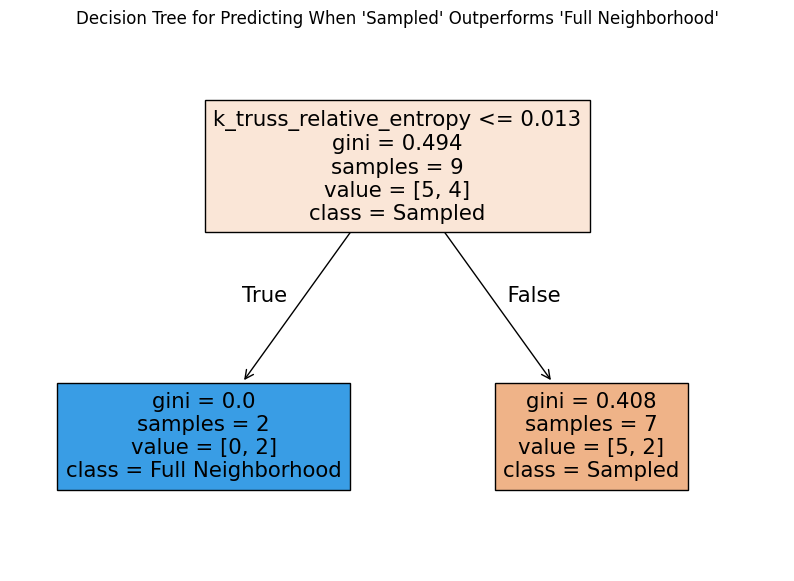

|--- k_truss_relative_entropy <= 0.01
|   |--- class: 1
|--- k_truss_relative_entropy >  0.01
|   |--- class: 0



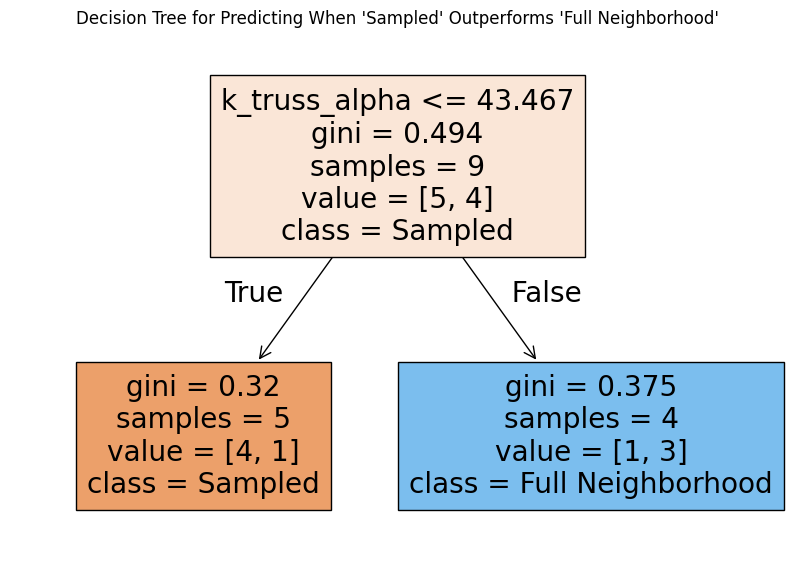

|--- k_truss_alpha <= 43.47
|   |--- class: 0
|--- k_truss_alpha >  43.47
|   |--- class: 1



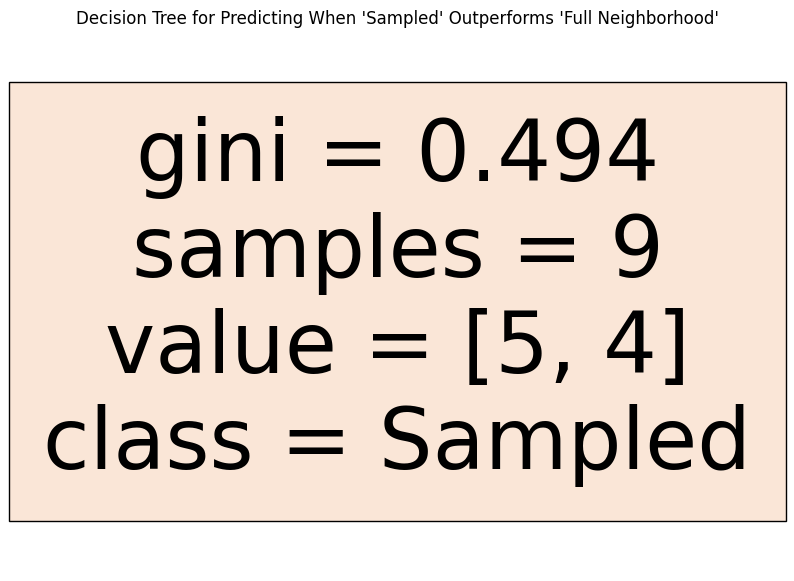

|--- class: 0



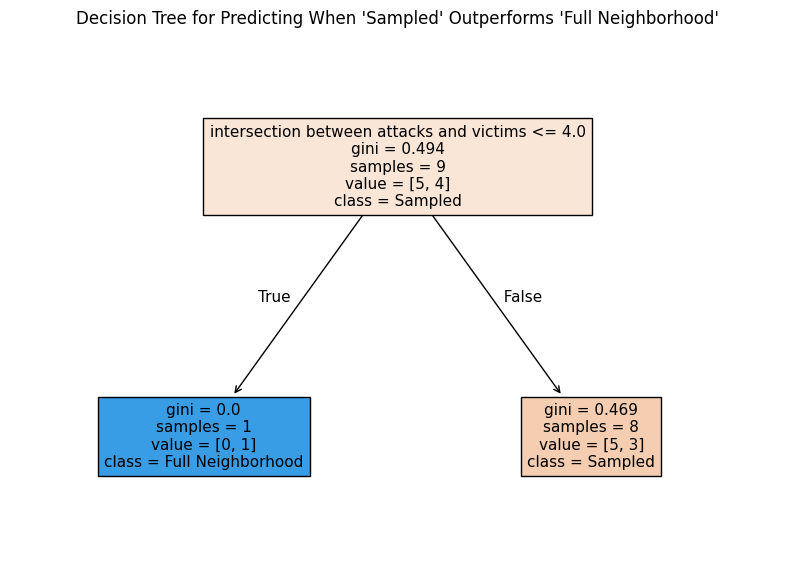

|--- intersection between attacks and victims <= 4.00
|   |--- class: 1
|--- intersection between attacks and victims >  4.00
|   |--- class: 0



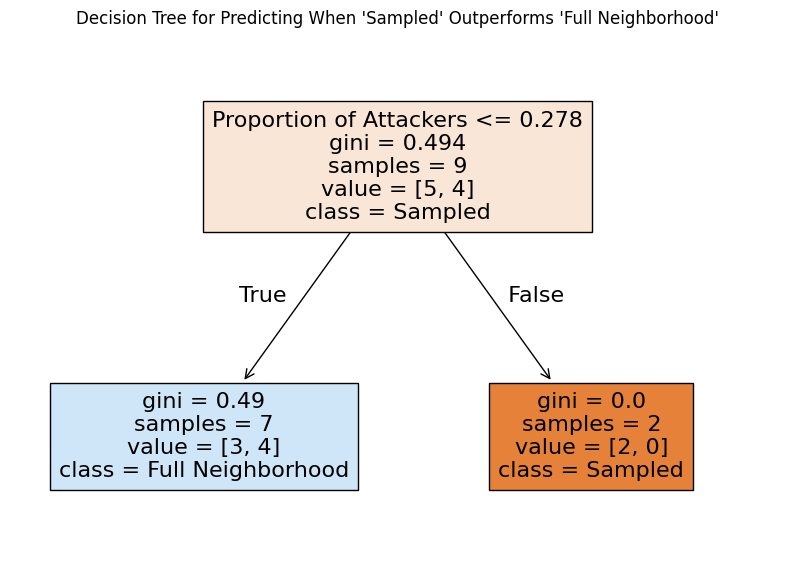

|--- Proportion of Attackers <= 0.28
|   |--- class: 1
|--- Proportion of Attackers >  0.28
|   |--- class: 0



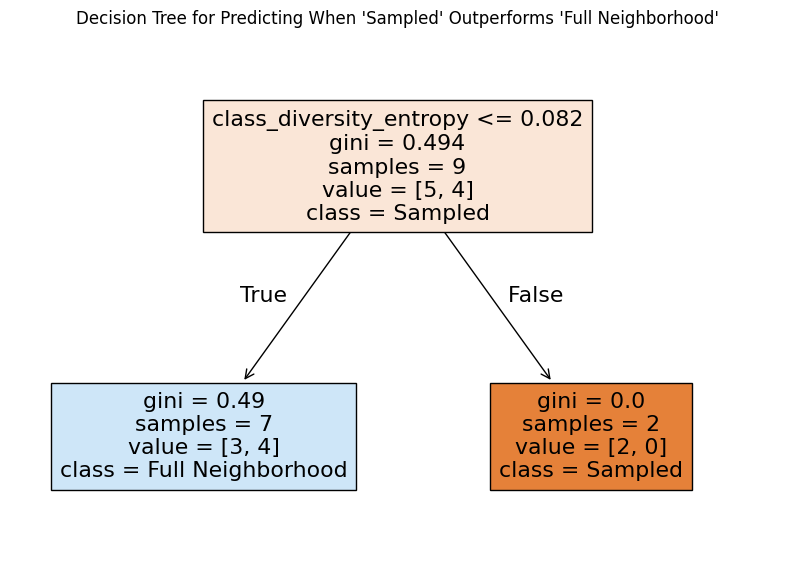

|--- class_diversity_entropy <= 0.08
|   |--- class: 1
|--- class_diversity_entropy >  0.08
|   |--- class: 0



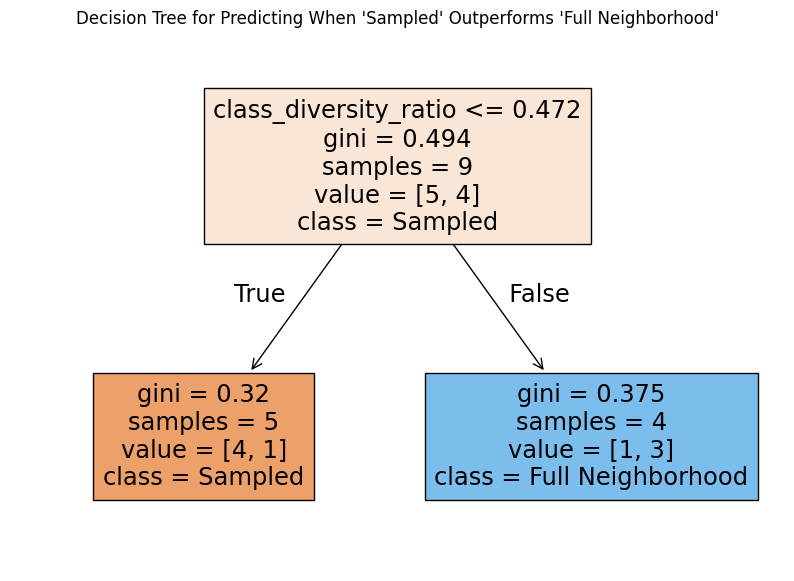

|--- class_diversity_ratio <= 0.47
|   |--- class: 0
|--- class_diversity_ratio >  0.47
|   |--- class: 1



In [139]:

print((f"Decision Tree for Predicting When '{class_names[0]}' Outperforms '{class_names[1]}'"))
merged_df['target'] = (merged_df[models[0]] > merged_df[models[1]]).astype(int)
for feature in feature_columns:
    X = merged_df[[feature]]
    y = merged_df['target']

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier(max_depth=1, random_state=42)
    dtc.fit(X, y)

    plt.figure(figsize=(10, 7))
    
    plot_tree(dtc, feature_names=[feature], class_names=class_names, filled=True)
    plt.title(f"Decision Tree for Predicting When '{class_names[0]}' Outperforms '{class_names[1]}'")
    plt.show()

    tree_rules = export_text(dtc, feature_names=[feature])
    print(tree_rules)



# New Thresholds

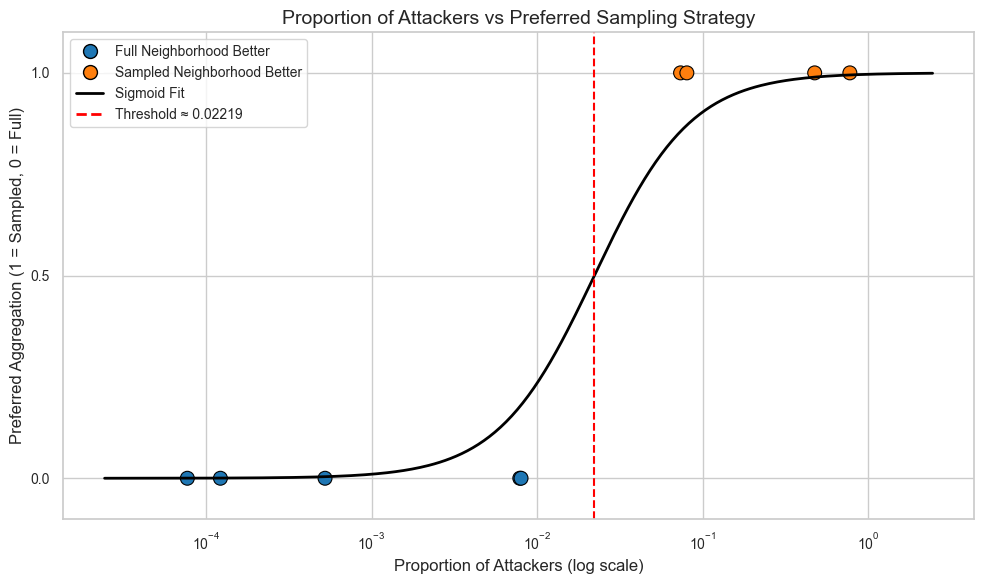

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data: Proportion of attackers (x) and which model performs better (y)
x = np.array([
    0.000077,
    0.000122,
    0.000523,
    0.007862,
    0.007998,
    0.073620,
    0.080357,
    0.475728,
    0.776236
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# Apply log-transform to the feature for model training
x_log = np.log10(x).reshape(-1, 1)

# Fit logistic regression on log-transformed x
model = LogisticRegression(class_weight='balanced', C=10)
model.fit(x_log, y)

# Prediction range in log-space
x_range_log = np.linspace(x_log.min() - 0.5, x_log.max() + 0.5, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range_log)[:, 1]

# Inverse log10 for plotting in original scale
x_range = 10 ** x_range_log.flatten()

# Compute threshold in log-space and convert back
threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Data points
scatter = sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                          s=100, edgecolor="black", legend=False)

# Logistic regression sigmoid curve
plt.plot(x_range, y_prob, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.5f}')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Full Neighborhood Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Sampled Neighborhood Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.5f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Log scale for x-axis
plt.xscale('log')

# Labels and styling
plt.title("Proportion of Attackers vs Preferred Sampling Strategy", fontsize=14)
plt.xlabel("Proportion of Attackers (log scale)", fontsize=12)
plt.ylabel("Preferred Aggregation (1 = Sampled, 0 = Full)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


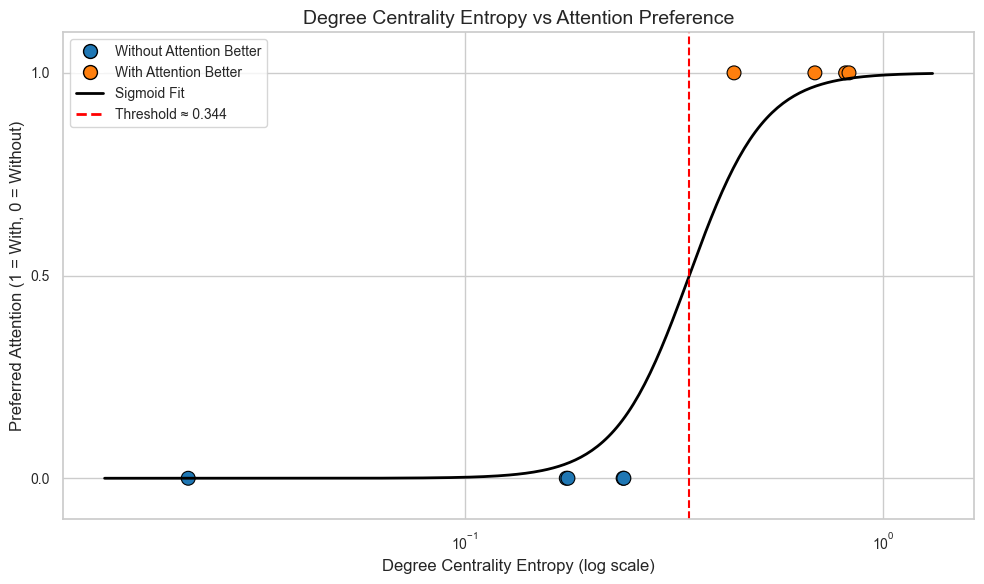

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data extracted from the table
# Degree centrality entropy
x = np.array([
    0.021798,  # Edge-IIoTset
    0.174882,  # CIC-ToN-IoT
    0.176466,  # CIC-ToN-IoT-Snapshot
    0.239182,  # NF-CSE-CIC-IDS2018
    0.240163,  # NF-UQ-NIDS
    0.440548,  # CIC-IDS-2017
    0.687675,  # NF-UQ-NIDS-Unified-Community
    0.814577,  # CCD-INID-Centrality-Focused
    0.829736   # X-IIoTID
])

# Labels: 0 = Without Attention Better, 1 = Attention Better
y = np.array([
    0,  # Edge-IIoTset
    0,  # CIC-ToN-IoT
    0,  # CIC-ToN-IoT-Snapshot
    0,  # NF-CSE-CIC-IDS2018
    0,  # NF-UQ-NIDS
    1,  # CIC-IDS-2017
    1,  # NF-UQ-NIDS-Unified-Community
    1,  # CCD-INID-Centrality-Focused
    1   # X-IIoTID
])

# Log-transform for training
x_log = np.log10(x).reshape(-1, 1)

# Fit logistic regression
model = LogisticRegression(class_weight='balanced', C=100)
model.fit(x_log, y)

# Generate curve
x_range_log = np.linspace(x_log.min() - 0.2, x_log.max() + 0.2, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range_log)[:, 1]
x_range = 10 ** x_range_log.flatten()

# Threshold
threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                s=100, edgecolor="black", legend=False)

# Sigmoid curve
plt.plot(x_range, y_prob, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.3f}')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Without Attention Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='With Attention Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.3f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Log scale
plt.xscale('log')

# Labels
plt.title("Degree Centrality Entropy vs Attention Preference", fontsize=14)
plt.xlabel("Degree Centrality Entropy (log scale)", fontsize=12)
plt.ylabel("Preferred Attention (1 = With, 0 = Without)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


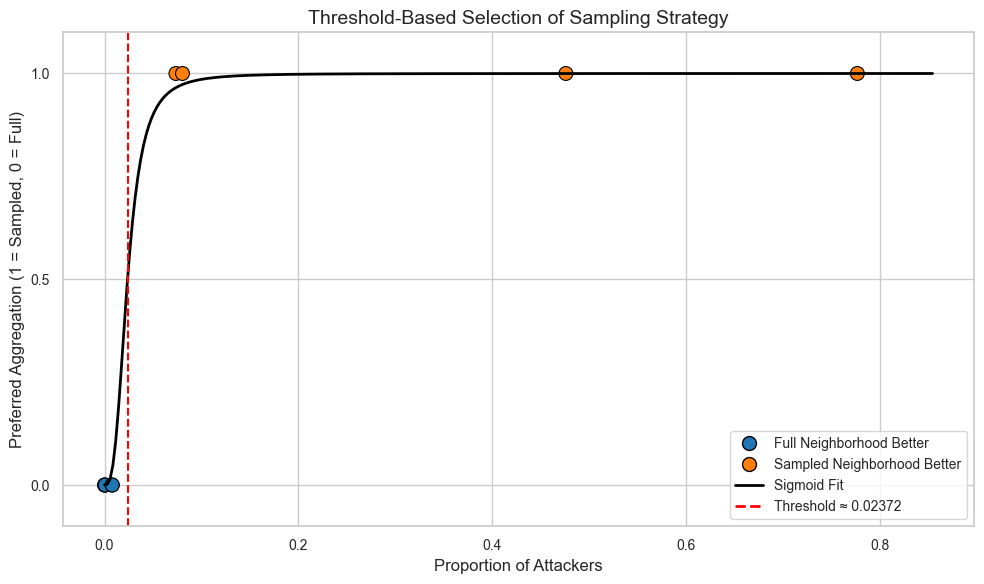

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data: Proportion of attackers (x) and which model performs better (y)
x = np.array([
    0.000077,
    0.000122,
    0.000523,
    0.007862,
    0.007998,
    0.073620,
    0.080357,
    0.475728,
    0.776236
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1])

# Fixing the issue by ensuring only valid (positive) x values are used for log transformation
# and plotting on linear scale without log-transforming new input range

x_log = np.log10(x).reshape(-1, 1)

model = LogisticRegression(class_weight='balanced', C=100)
model.fit(x_log, y)


threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log


x_range_lin = np.linspace(min(x) * 0.9, max(x) * 1.1, 300)
x_range_lin_log = np.log10(x_range_lin).reshape(-1, 1)
y_prob_lin = model.predict_proba(x_range_lin_log)[:, 1]

# Plot on linear x-axis
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Data points
sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                s=100, edgecolor="black", legend=False)

# Logistic regression sigmoid curve
plt.plot(x_range_lin, y_prob_lin, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.5f}')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Full Neighborhood Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Sampled Neighborhood Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.5f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Labels and styling
plt.title("Threshold-Based Selection of Sampling Strategy", fontsize=14)
plt.xlabel("Proportion of Attackers", fontsize=12)
plt.ylabel("Preferred Aggregation (1 = Sampled, 0 = Full)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


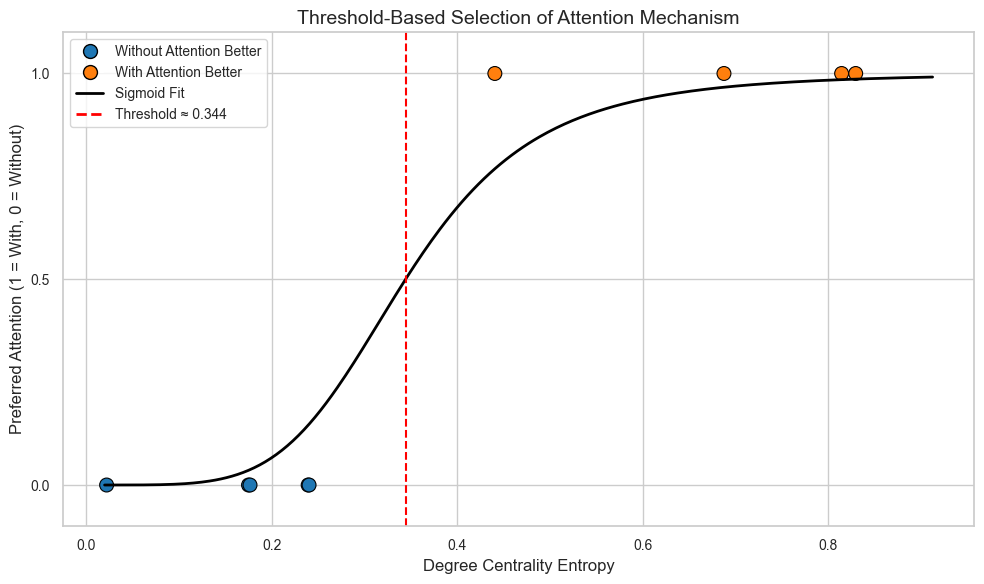

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib.lines import Line2D

# Data: Degree centrality entropy and label (1 = attention better, 0 = no attention better)
x = np.array([
    0.021798,  # Edge-IIoTset
    0.174882,  # CIC-ToN-IoT
    0.176466,  # CIC-ToN-IoT-Snapshot
    0.239182,  # NF-CSE-CIC-IDS2018
    0.240163,  # NF-UQ-NIDS
    0.440548,  # CIC-IDS-2017
    0.687675,  # NF-UQ-NIDS-Unified-Community
    0.814577,  # CCD-INID-Centrality-Focused
    0.829736   # X-IIoTID
])

y = np.array([
    0, 0, 0, 0, 0,  # First five: no attention is better
    1, 1, 1, 1       # Last four: attention is better
])

# Log-transform input for model training
x_log = np.log10(x).reshape(-1, 1)

# Train logistic regression on log-transformed entropy
model = LogisticRegression(class_weight='balanced', C=100)
model.fit(x_log, y)

# Compute threshold from model
threshold_log = -model.intercept_[0] / model.coef_[0][0]
threshold = 10 ** threshold_log

# Create linear x range for smooth curve
x_range_lin = np.linspace(min(x) * 0.9, max(x) * 1.1, 300)
x_range_lin_log = np.log10(x_range_lin).reshape(-1, 1)
y_prob_lin = model.predict_proba(x_range_lin_log)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Data points
sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"],
                s=100, edgecolor="black", legend=False)

# Sigmoid fit curve
plt.plot(x_range_lin, y_prob_lin, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.3f}')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Without Attention Better',
           markerfacecolor='#1f77b4', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='With Attention Better',
           markerfacecolor='#ff7f0e', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2, label='Sigmoid Fit'),
    Line2D([0], [0], color='red', linestyle='--', lw=2, label=f'Threshold ≈ {threshold:.3f}')
]
plt.legend(handles=legend_elements, fontsize=10)

# Labels and layout
plt.title("Threshold-Based Selection of Attention Mechanism", fontsize=14)
plt.xlabel("Degree Centrality Entropy", fontsize=12)
plt.ylabel("Preferred Attention (1 = With, 0 = Without)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


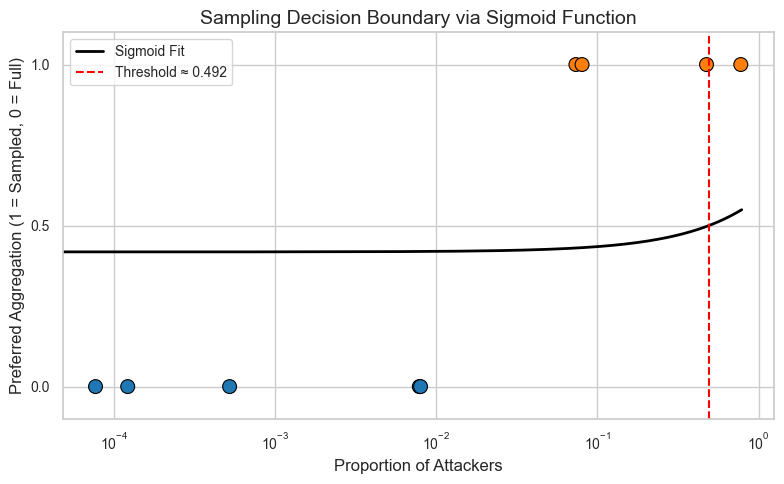

In [3]:
# Plotting a true sigmoid curve for better visual alignment

# Define sigmoid function manually for control
def sigmoid(x):
    z = model.intercept_[0] + model.coef_[0][0] * x
    return 1 / (1 + np.exp(-z))

# Generate y values using sigmoid
y_sigmoid = sigmoid(x_range)

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Data points
sns.scatterplot(x=x, y=y, hue=y, palette=["#1f77b4", "#ff7f0e"], s=100, edgecolor="black", legend=False)

# Sigmoid curve
plt.plot(x_range, y_sigmoid, color='black', linewidth=2, label='Sigmoid Fit')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.3f}')
plt.xscale('log')
# Labels and styling
plt.title("Sampling Decision Boundary via Sigmoid Function", fontsize=14)
plt.xlabel("Proportion of Attackers", fontsize=12)
plt.ylabel("Preferred Aggregation (1 = Sampled, 0 = Full)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([0, 0.5, 1], fontsize=10)
plt.ylim(-0.1, 1.1)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
